In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class FocalLossVariant(nn.Module):
    def __init__(self, gamma, beta):
        super(FocalLossVariant, self).__init__()
        self.gamma = gamma
        self.beta = beta
        
    def forward(self, logits, targets):
        gamma, beta = self.gamma, self.beta
        
        # x_t = x * y
        x_t = logits * targets
        
        # p_t = σ(γ * x_t + β)
        p_t = torch.sigmoid((gamma * x_t) + beta)
        
        # loss = -log(p_t) / γ
        loss = -torch.log(p_t) / gamma
        
        return loss


In [3]:
class FocalLoss(nn.Module):
    def __init__(self, gamma):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        
    def forward(self, logits, targets):
        gamma = self.gamma
        
        # x_t = x * y
        x_t = logits * targets
        
        # p_t = σ(x_t)
        p_t = torch.sigmoid(x_t)
        
        # factor = (1 - p_t) ** γ
        factor = torch.pow(1 - p_t, gamma)
        
        # loss = -factor * log(p_t)
        loss = -factor * torch.log(p_t)
        
        return loss
        

In [4]:
class CELoss(nn.Module):
    def __init__(self):
        super(CELoss, self).__init__()
        
    def forward(self, logits, targets):
        # x_t = x * y
        x_t = logits * targets
        
        # p_t = σ(x_t)
        p_t = torch.sigmoid(x_t)
        
        # loss = -log(p_t)
        loss = -torch.log(p_t)
        return loss

In [5]:
data_size = 100

# construct x, score outputs of range [-5, 5] 
X = np.linspace(-5, 5, data_size)

# construct targets
y = np.ones(data_size)

In [6]:
# variant of focal loss with γ=2, β=1
criterion_1 = FocalLossVariant(2.0, 1.0)

# variant of focal loss with γ=4, β=0
criterion_2 = FocalLossVariant(4.0, 0.0)

# focal loss with γ=2
criterion_3 = FocalLoss(2.0)

# cross-entropy loss
criterion_4 = CELoss()

In [7]:
# compute losses and gradients

criterions = [criterion_1, criterion_2, criterion_3, criterion_4]

losses = np.zeros((len(criterions), data_size))
grads = np.zeros((len(criterions), data_size))

for i, criterion in enumerate(criterions):
    for j in range(data_size):
        x = torch.tensor(X[j], requires_grad = True)
        loss = criterion(x, y[j])
        loss.backward()
        grad = x.grad
        losses[i][j] = loss
        grads[i][j] = grad

In [8]:
# get distinct losses and gradients

# variant of focal loss with γ=2, β=1
focal_loss_var_1 = losses[0]
focal_loss_var_1_grad = grads[0] 

# variant of focal loss with γ=4, β=0
focal_loss_var_2 = losses[1]
focal_loss_var_2_grad = grads[1]

# focal loss with γ=2
focal_loss = losses[2]
focal_loss_grad = grads[2]

# cross-entropy loss
ce_loss = losses[3]
ce_loss_grad = grads[3]


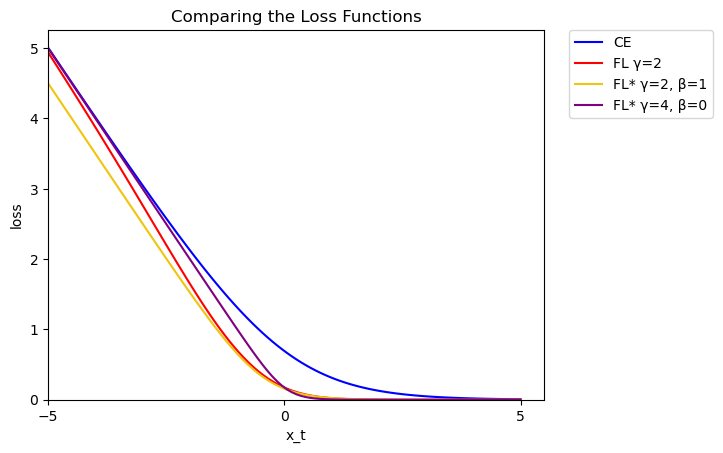

In [9]:
# plotting losses

plt.title("Comparing the Loss Functions")
plt.xlabel("x_t")
plt.ylabel("loss")

with torch.no_grad():
    x_t = X * y
    plt.plot(x_t, ce_loss, color ="blue", label='CE')
    plt.plot(x_t, focal_loss, color ="red", label='FL γ=2')
    plt.plot(x_t, focal_loss_var_1, color ="#F1C40F", label='FL* γ=2, β=1')
    plt.plot(x_t, focal_loss_var_2, color ="purple", label='FL* γ=4, β=0')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(left=-5)
plt.ylim(bottom=0)
plt.xticks([-5, 0, 5])
plt.show()

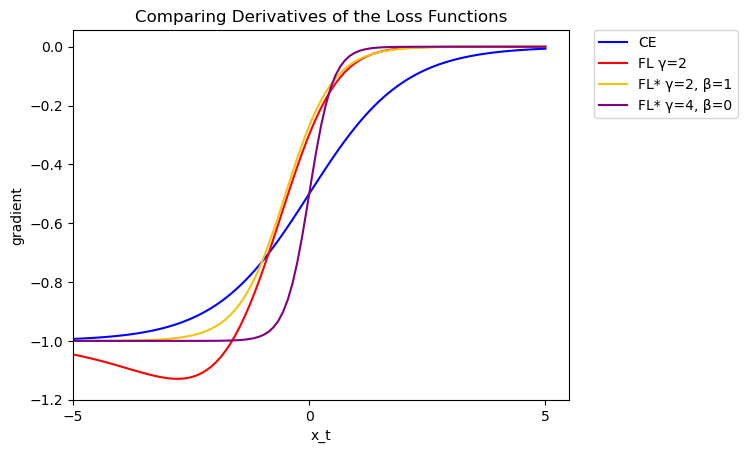

In [10]:
# plotting gradients 

plt.title("Comparing Derivatives of the Loss Functions")
plt.xlabel("x_t")
plt.ylabel("gradient")

# plot gradients
with torch.no_grad():
    x_t = X * y
    plt.plot(x_t, ce_loss_grad, color ="blue", label='CE')
    plt.plot(x_t, focal_loss_grad, color ="red", label='FL γ=2')
    plt.plot(x_t, focal_loss_var_1_grad, color ="#F1C40F", label='FL* γ=2, β=1')
    plt.plot(x_t, focal_loss_var_2_grad, color ="purple", label='FL* γ=4, β=0')

    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(left=-5)
plt.ylim(bottom=-1.2)
plt.xticks([-5, 0, 5])
plt.show()